In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/advertising-budget.csv")

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# T: Transpose index and columns

pd.DataFrame(data.isnull().sum(), columns = ["null_count"]).T

,TV,Radio,Newspaper,Sales
null_count,0,0,0,0


#### Linear Regression

prediction = intercept + coefficient(1) * x(1) + coefficient(2) * x(2) + coefficient(n) * x(n)

#### Predict based on one feature

In [4]:
x = data[["TV"]]
y = data["Sales"]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size = 0.8, random_state = 50)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [7]:
intercept = model.intercept_
coef1 = model.coef_[0]

"intercept:", intercept, "coefficient (TV):", coef1

('intercept:', 6.889929307794299, 'coefficient (TV):', 0.05671243947672504)

In [8]:
sample_data = [[120]]

model.predict(sample_data)

array([13.69542205])

In [9]:
sample_data = 120

intercept + coef1 * sample_data

13.695422045001305

In [10]:
y_predict = model.predict(x_test)

In [11]:
model_data = pd.DataFrame({ "actual": y_test, "prediction": y_predict })

model_data.head()

,actual,prediction
0,17.1,16.854305
1,16.9,20.188996
2,9.2,8.239685
3,11.0,14.228519
4,12.3,12.345666


In [12]:
import numpy as np
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

"mae:", mae, "rmse", rmse

('mae:', 1.7416080983197326, 'rmse', 2.1578928845446366)

<Axes: >

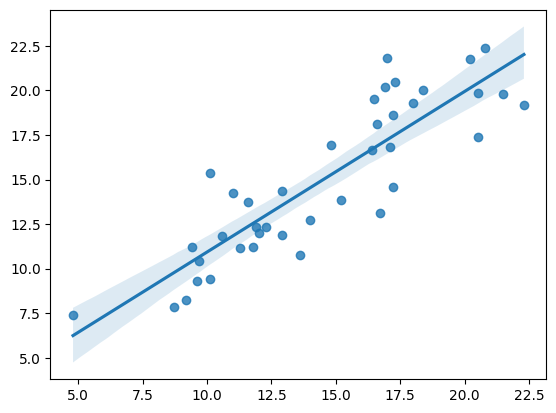

In [13]:
sns.regplot(x = y_test, y = y_predict)

#### Predict based on multi features

In [14]:
x = data[["TV", "Radio", "Newspaper"]]
y = data["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size = 0.8, random_state = 15)

In [15]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [16]:
intercept = model.intercept_
coef = model.coef_

"intercept", intercept, "coefficient (TV):", coef[0], "(Radio):", coef[1], "(Newspaper):", coef[2]

('intercept',
 4.40330106498673,
 'coefficient (TV):',
 0.05579385181816195,
 '(Radio):',
 0.10182202992020359,
 '(Newspaper):',
 0.004155447835227255)

In [17]:
sample_data = [[120, 50, 60]]

model.predict(sample_data)

array([16.43899165])

In [18]:
y_predict = model.predict(x_test)

In [19]:
model_data = pd.DataFrame({ "actual": y_test, "prediction": y_predict })

model_data.head()

,actual,prediction
0,9.7,9.480148
1,11.9,9.740347
2,9.2,9.578992
3,7.6,7.614126
4,11.9,8.916198


In [20]:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

"mae:", mae, "rmse", rmse

('mae:', 1.1694394885747708, 'rmse', 1.646544838553863)

<Axes: >

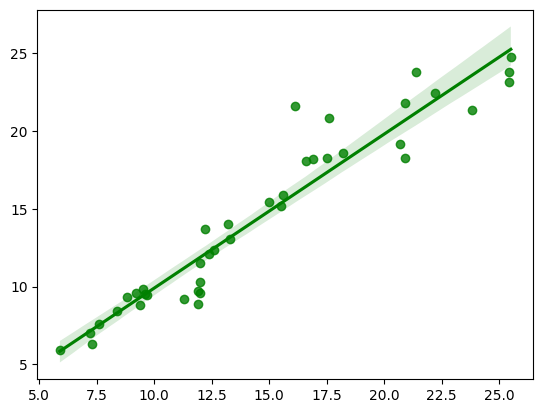

In [21]:
sns.regplot(x = y_test, y = y_predict, color = "green")